<a href="https://colab.research.google.com/github/ak-malone/NLU/blob/main/pics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
pics = pd.read_json("hf://datasets/embedding-data/flickr30k_captions_quintets/flickr30k_captions.jsonl.gz", lines=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
pics = pd.DataFrame(pics['set'].to_list(), columns=['caption1','caption2', 'caption3','caption4','caption5'])

In [4]:
pics.dropna(inplace=True)

In [5]:
pics

,caption1,caption2,caption3,caption4,caption5
0,Two men in green shirts are standing in a yard.,"Two young, White males are outside near many b...",Two young guys with shaggy hair look at their ...,A man in a blue shirt standing in a garden.,Two friends enjoy time spent together.
1,Four men on top of a tall structure.,Workers look down from up above on a piece of ...,Several men in hard hats are operating a giant...,Three men on a large rig.,Two men working on a machine wearing hard hats.
2,A child in a pink dress is climbing up a set o...,A girl going into a wooden building.,A little girl climbing into a wooden playhouse,A little girl in a pink dress going into a woo...,A little girl climbing the stairs to her playh...
3,a man on a ladder cleans a window,Someone in a blue shirt and hat is standing on...,man in blue shirt and jeans on ladder cleaning...,A man in a blue shirt is standing on a ladder ...,A man on a ladder cleans the window of a tall ...
4,"Two men, one in a gray shirt, one in a black s...",Two men in a kitchen cooking food on a stove.,Two men are cooking a meal.,Two men are at the stove preparing food.,Two guy cooking and joking around with the cam...
...,...,...,...,...,...
31778,A woman standing near a decorated wall writes.,"Woman writing on a pad in room with gold, deco...",a woman behind a scrolled wall is writing,A person stands near golden walls.,The walls are covered in gold and patterns.
31779,A rock climber practices on a rock climbing wall.,A man in a pink shirt climbs a rock face,A person in a red shirt climbing up a rock fac...,A rock climber in a red shirt.,A man is rock climbing high in the air.
31780,Men in orange and yellow clothing lean over a ...,Fruits stationed by a dusty old window.,Two male construction workers are working on a...,Two workmen with a wheelbarrow for mixing ceme...,Men are working on pouring concrete outside of...
31781,An elderly gentleman playing a musical instrum...,An elderly man sits outside a storefront accom...,An older busker in glasses plays an Eastern st...,A older Asian man is playing an instrument in ...,This is a man in front of a store performing w...


In [6]:
#pics = pd.DataFrame(pics['set'].to_list(), columns=['caption1','caption2', 'caption3','caption4','caption5']).drop(columns=['caption3','caption4','caption5'])

In [7]:
#pics = pd.read_parquet("hf://datasets/sentence-transformers/flickr30k-captions/pair/train-00000-of-00001.parquet")

In [8]:
# Select 300 random rows
pics = pics.sample(n=300, random_state=42) #, ignore_index=True)
pics

,caption1,caption2,caption3,caption4,caption5
4222,A bald man is about to cook some kind of fish.,"A bald man is cooking on a stove, throwing a s...",Adult white male holding a blue crab over a po...,A Shaved man about to put a blue crab in a boi...,A bald man picking up a blue crap with tongs a...
29122,A woman dressed with a pink jacket and jeans i...,A Spanish looking woman carries a heavy red ba...,A woman is walking in front of graffiti-covere...,A middle-aged woman is hauling a large red bag...,An older woman is carrying a large red sack in...
19229,A child looking at desserts with awe.,A child with blond-hair is looking at a select...,A little boy with blond-hair stares down at di...,A little kid is admiring the display in a bake...,A kid looking at cookies in a bakery.
14111,A group of people are standing around a red fi...,A group of people with a fire engine in the ba...,A group of people are standing beside a firetr...,A group of people in front of a red firetruck.,A red firetruck is parked beside a group of pe...
3908,A child runs on a dirt path along the street.,"Little boy in walking shorts and sweater, on t...",A small boy in an orange hat running.,a little boy plays at the zoo.,A young boy in a red cap catching up with his ...
...,...,...,...,...,...
20395,A crowd of people listening to a speech.,A large group of people is gathered in front o...,A group of people stand watching something ahead.,A large group of people are gathered outside o...,A large group of people are gathered around a ...
8866,A man is riding a tall unicycle and juggling p...,A man in a bright yellow shirt juggles while r...,"Man on a tall unicycle, who is wearing bright ...",A man wearing a yellow shirt riding a unicycle...,A street performer entertains a group of peopl...
10555,A group of women sit on the back of a flatbed ...,Several people are sitting on the back of a tr...,"a crowd gather together, all looking in the sa...",People sitting on the roof observing something...,Eight people sit on railroad tracks.
21966,Three men and a small crowd of other people wa...,Three young men in a crowd watching tennis on ...,Three young men are watching a tennis match on...,three young men stand behind a net watching a ...,Three young men discuss a sports match from th...


In [9]:
pics["caption1_words"] = pics.caption1.str.split()
pics["caption2_words"] = pics.caption2.str.split()

In [10]:
def Jaccard(text1, text2, prints=False):
  intersection = set(text1.split()) & set(text2.split())
  union = len(set(text1.split()) | set(text2.split()))
  if prints:
    print(set(text1.split()))
    print(set(text2.split()))
    print("overlap: ", intersection)
    print("Total words: ", union)
  return(len(intersection)/union)

In [11]:
pics["Jaccard_Similarity"] = pics.apply(lambda x: Jaccard(x.caption1, x.caption2), axis=1)
sim_cols = ["Jaccard_Similarity"]

In [12]:
pics

,caption1,caption2,caption3,caption4,caption5,caption1_words,caption2_words,Jaccard_Similarity
4222,A bald man is about to cook some kind of fish.,"A bald man is cooking on a stove, throwing a s...",Adult white male holding a blue crab over a po...,A Shaved man about to put a blue crab in a boi...,A bald man picking up a blue crap with tongs a...,"[A, bald, man, is, about, to, cook, some, kind...","[A, bald, man, is, cooking, on, a, stove,, thr...",0.200000
29122,A woman dressed with a pink jacket and jeans i...,A Spanish looking woman carries a heavy red ba...,A woman is walking in front of graffiti-covere...,A middle-aged woman is hauling a large red bag...,An older woman is carrying a large red sack in...,"[A, woman, dressed, with, a, pink, jacket, and...","[A, Spanish, looking, woman, carries, a, heavy...",0.173913
19229,A child looking at desserts with awe.,A child with blond-hair is looking at a select...,A little boy with blond-hair stares down at di...,A little kid is admiring the display in a bake...,A kid looking at cookies in a bakery.,"[A, child, looking, at, desserts, with, awe.]","[A, child, with, blond-hair, is, looking, at, ...",0.333333
14111,A group of people are standing around a red fi...,A group of people with a fire engine in the ba...,A group of people are standing beside a firetr...,A group of people in front of a red firetruck.,A red firetruck is parked beside a group of pe...,"[A, group, of, people, are, standing, around, ...","[A, group, of, people, with, a, fire, engine, ...",0.312500
3908,A child runs on a dirt path along the street.,"Little boy in walking shorts and sweater, on t...",A small boy in an orange hat running.,a little boy plays at the zoo.,A young boy in a red cap catching up with his ...,"[A, child, runs, on, a, dirt, path, along, the...","[Little, boy, in, walking, shorts, and, sweate...",0.083333
...,...,...,...,...,...,...,...,...
20395,A crowd of people listening to a speech.,A large group of people is gathered in front o...,A group of people stand watching something ahead.,A large group of people are gathered outside o...,A large group of people are gathered around a ...,"[A, crowd, of, people, listening, to, a, speech.]","[A, large, group, of, people, is, gathered, in...",0.250000
8866,A man is riding a tall unicycle and juggling p...,A man in a bright yellow shirt juggles while r...,"Man on a tall unicycle, who is wearing bright ...",A man wearing a yellow shirt riding a unicycle...,A street performer entertains a group of peopl...,"[A, man, is, riding, a, tall, unicycle, and, j...","[A, man, in, a, bright, yellow, shirt, juggles...",0.217391
10555,A group of women sit on the back of a flatbed ...,Several people are sitting on the back of a tr...,"a crowd gather together, all looking in the sa...",People sitting on the roof observing something...,Eight people sit on railroad tracks.,"[A, group, of, women, sit, on, the, back, of, ...","[Several, people, are, sitting, on, the, back,...",0.294118
21966,Three men and a small crowd of other people wa...,Three young men in a crowd watching tennis on ...,Three young men are watching a tennis match on...,three young men stand behind a net watching a ...,Three young men discuss a sports match from th...,"[Three, men, and, a, small, crowd, of, other, ...","[Three, young, men, in, a, crowd, watching, te...",0.277778


Stats bit

In [13]:
#pics = pics[pics.Jaccard_Similarity != 0]

In [14]:
def logloss(df,col,sim):
  return -sim*sum(np.log(df[col]+0.001))/len(df)-(1-sim)*sum(np.log(1-df[col]+0.001)/len(df))

In [15]:
log_loss = [[sim_cols[-1], logloss(pics,sim_cols[-1],True)]]
print("Log Loss: ", log_loss[-1])

Log Loss:  ['Jaccard_Similarity', 2.0158581029742764]


<Axes: >

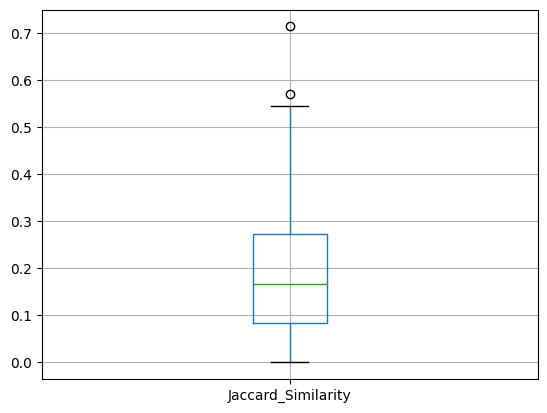

In [16]:
pics.boxplot(column=sim_cols)

In [17]:
pics.loc[pics['Jaccard_Similarity'].idxmax()][["caption1", "caption2", "Jaccard_Similarity"]]

,19521
caption1,Four young boy scouts on stage in front of gre...
caption2,Four boy scouts are on a stage in front of the...
Jaccard_Similarity,0.714286


In [18]:
pics.loc[pics['Jaccard_Similarity'].idxmin()][["caption1", "caption2", "Jaccard_Similarity"]]

,27922
caption1,Ice skater stretching her legs before performing.
caption2,A Beautiful young lady dancing on a loop
Jaccard_Similarity,0.0


#Preprocessing

In [19]:
def create_bow(documents):
  return list(set([word for movie_description in (documents) for word in movie_description]))

In [20]:
listofcaptions = pics.caption1_words.tolist()+pics.caption2_words.tolist()
bagofwords = create_bow(listofcaptions)
len(bagofwords)

1763

In [21]:
pics["caption1_lower"] = pics.caption1.str.lower()
pics["caption2_lower"] = pics.caption2.str.lower()

In [22]:
pics["caption1_lower_words"] = pics.caption1_lower.str.split()
pics["caption2_lower_words"] = pics.caption2_lower.str.split()

In [23]:
listoflowercaptions = pics.caption1_lower_words.tolist()+pics.caption2_lower_words.tolist()
bagoflowerwords = create_bow(listoflowercaptions)
len(bagoflowerwords)

1707

In [25]:
pics["caption1_processed"] = pics["caption1_lower"].str.replace(r'[^\w\s]+', '', regex=True)
pics["caption2_processed"] = pics["caption2_lower"].str.replace(r'[^\w\s]+', '', regex=True)
pics["caption1_processed_words"] = pics.caption1_processed.str.split()
pics["caption2_processed_words"] = pics.caption2_processed.str.split()

In [26]:
listofppcaptions = pics.caption1_processed_words.tolist()+pics.caption2_processed_words.tolist()
bagofppwords = create_bow(listofppcaptions)
len(bagofppwords)

1436

In [27]:
pics

,caption1,caption2,caption3,caption4,caption5,caption1_words,caption2_words,Jaccard_Similarity,caption1_lower,caption2_lower,caption1_lower_words,caption2_lower_words,caption1_processed,caption2_processed,caption1_processed_words,caption2_processed_words
4222,A bald man is about to cook some kind of fish.,"A bald man is cooking on a stove, throwing a s...",Adult white male holding a blue crab over a po...,A Shaved man about to put a blue crab in a boi...,A bald man picking up a blue crap with tongs a...,"[A, bald, man, is, about, to, cook, some, kind...","[A, bald, man, is, cooking, on, a, stove,, thr...",0.200000,a bald man is about to cook some kind of fish.,"a bald man is cooking on a stove, throwing a s...","[a, bald, man, is, about, to, cook, some, kind...","[a, bald, man, is, cooking, on, a, stove,, thr...",a bald man is about to cook some kind of fish,a bald man is cooking on a stove throwing a st...,"[a, bald, man, is, about, to, cook, some, kind...","[a, bald, man, is, cooking, on, a, stove, thro..."
29122,A woman dressed with a pink jacket and jeans i...,A Spanish looking woman carries a heavy red ba...,A woman is walking in front of graffiti-covere...,A middle-aged woman is hauling a large red bag...,An older woman is carrying a large red sack in...,"[A, woman, dressed, with, a, pink, jacket, and...","[A, Spanish, looking, woman, carries, a, heavy...",0.173913,a woman dressed with a pink jacket and jeans i...,a spanish looking woman carries a heavy red ba...,"[a, woman, dressed, with, a, pink, jacket, and...","[a, spanish, looking, woman, carries, a, heavy...",a woman dressed with a pink jacket and jeans i...,a spanish looking woman carries a heavy red ba...,"[a, woman, dressed, with, a, pink, jacket, and...","[a, spanish, looking, woman, carries, a, heavy..."
19229,A child looking at desserts with awe.,A child with blond-hair is looking at a select...,A little boy with blond-hair stares down at di...,A little kid is admiring the display in a bake...,A kid looking at cookies in a bakery.,"[A, child, looking, at, desserts, with, awe.]","[A, child, with, blond-hair, is, looking, at, ...",0.333333,a child looking at desserts with awe.,a child with blond-hair is looking at a select...,"[a, child, looking, at, desserts, with, awe.]","[a, child, with, blond-hair, is, looking, at, ...",a child looking at desserts with awe,a child with blondhair is looking at a selecti...,"[a, child, looking, at, desserts, with, awe]","[a, child, with, blondhair, is, looking, at, a..."
14111,A group of people are standing around a red fi...,A group of people with a fire engine in the ba...,A group of people are standing beside a firetr...,A group of people in front of a red firetruck.,A red firetruck is parked beside a group of pe...,"[A, group, of, people, are, standing, around, ...","[A, group, of, people, with, a, fire, engine, ...",0.312500,a group of people are standing around a red fi...,a group of people with a fire engine in the ba...,"[a, group, of, people, are, standing, around, ...","[a, group, of, people, with, a, fire, engine, ...",a group of people are standing around a red fi...,a group of people with a fire engine in the ba...,"[a, group, of, people, are, standing, around, ...","[a, group, of, people, with, a, fire, engine, ..."
3908,A child runs on a dirt path along the street.,"Little boy in walking shorts and sweater, on t...",A small boy in an orange hat running.,a little boy plays at the zoo.,A young boy in a red cap catching up with his ...,"[A, child, runs, on, a, dirt, path, along, the...","[Little, boy, in, walking, shorts, and, sweate...",0.083333,a child runs on a dirt path along the street.,"little boy in walking shorts and sweater, on t...","[a, child, runs, on, a, dirt, path, along, the...","[little, boy, in, walking, shorts, and, sweate...",a child runs on a dirt path along the street,little boy in walking shorts and sweater on th...,"[a, child, runs, on, a, dirt, path, along, the...","[little, boy, in, walkin

Redo Jaccard

In [29]:
pics["Jaccard_Similarity_processed"] = pics.apply(lambda x: Jaccard(x.caption1_processed, x.caption2_processed), axis=1)
sim_cols.append("Jaccard_Similarity_processed")

In [30]:
log_loss.extend([[sim_cols[-1], logloss(pics,sim_cols[-1],True)]])
print("Log Loss: ")
print(log_loss)

Log Loss: 
[['Jaccard_Similarity', 2.0158581029742764], ['Jaccard_Similarity_processed', 1.8131710672400072]]


<Axes: >

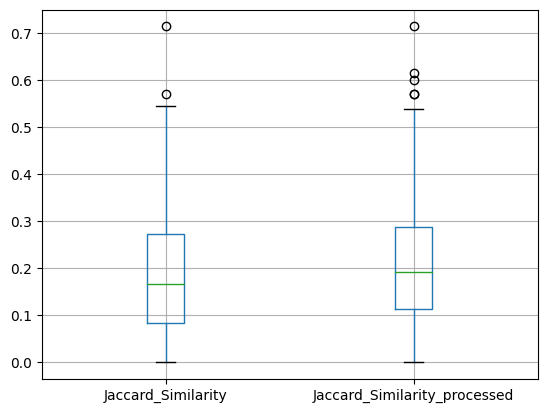

In [31]:
pics.boxplot(column=sim_cols)

#TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine

In [33]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(pics.caption1.tolist()+pics.caption2.tolist()+pics.caption3.tolist()+pics.caption4.tolist()+pics.caption5.tolist())
tfidf_matrix_caption1 = tfidf_matrix[0:300]
tfidf_matrix_caption2 = tfidf_matrix[300:600]
tfidf_matrix_caption3 = tfidf_matrix[600:900]
tfidf_matrix_caption4 = tfidf_matrix[900:1200]
tfidf_matrix_caption5 = tfidf_matrix[1200:1500]
pics["caption1_tfidf_sklearn"] = tfidf_matrix_caption1.toarray().tolist()
pics["caption2_tfidf_sklearn"] = tfidf_matrix_caption2.toarray().tolist()
pics["caption3_tfidf_sklearn"] = tfidf_matrix_caption1.toarray().tolist()
pics["caption4_tfidf_sklearn"] = tfidf_matrix_caption2.toarray().tolist()
pics["caption5_tfidf_sklearn"] = tfidf_matrix_caption2.toarray().tolist()

In [34]:
pics

,caption1,caption2,caption3,caption4,caption5,caption1_words,caption2_words,Jaccard_Similarity,caption1_lower,caption2_lower,...,caption1_processed,caption2_processed,caption1_processed_words,caption2_processed_words,Jaccard_Similarity_processed,caption1_tfidf_sklearn,caption2_tfidf_sklearn,caption3_tfidf_sklearn,caption4_tfidf_sklearn,caption5_tfidf_sklearn
4222,A bald man is about to cook some kind of fish.,"A bald man is cooking on a stove, throwing a s...",Adult white male holding a blue crab over a po...,A Shaved man about to put a blue crab in a boi...,A bald man picking up a blue crap with tongs a...,"[A, bald, man, is, about, to, cook, some, kind...","[A, bald, man, is, cooking, on, a, stove,, thr...",0.200000,a bald man is about to cook some kind of fish.,"a bald man is cooking on a stove, throwing a s...",...,a bald man is about to cook some kind of fish,a bald man is cooking on a stove throwing a st...,"[a, bald, man, is, about, to, cook, some, kind...","[a, bald, man, is, cooking, on, a, stove, thro...",0.277778,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.35487949757857384,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.35487949757857384,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
29122,A woman dressed with a pink jacket and jeans i...,A Spanish looking woman carries a heavy red ba...,A woman is walking in front of graffiti-covere...,A middle-aged woman is hauling a large red bag...,An older woman is carrying a large red sack in...,"[A, woman, dressed, with, a, pink, jacket, and...","[A, Spanish, looking, woman, carries, a, heavy...",0.173913,a woman dressed with a pink jacket and jeans i...,a spanish looking woman carries a heavy red ba...,...,a woman dressed with a pink jacket and jeans i...,a spanish looking woman carries a heavy red ba...,"[a, woman, dressed, with, a, pink, jacket, and...","[a, spanish, looking, woman, carries, a, heavy...",0.136364,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19229,A child looking at desserts with awe.,A child with blond-hair is looking at a select...,A little boy with blond-hair stares down at di...,A little kid is admiring the display in a bake...,A kid looking at cookies in a bakery.,"[A, child, looking, at, desserts, with, awe.]","[A, child, with, blond-hair, is, looking, at, ...",0.333333,a child looking at desserts with awe.,a child with blond-hair is looking at a select...,...,a child looking at desserts with awe,a child with blondhair is looking at a selecti...,"[a, child, looking, at, desserts, with, awe]","[a, child, with, blondhair, is, looking, at, a...",0.357143,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14111,A group of people are standing around a red fi...,A group of people with a fire engine in the ba...,A group of people are standing beside a firetr...,A group of people in front of a red firetruck.,A red firetruck is parked beside a group of pe...,"[A, group, of, people, are, standing, around, ...","[A, group, of, people, with, a, fire, engine, ...",0.312500,a group of people are standing around a red fi...,a group of people with a fire engine in the ba...,...,a group of people are standing around a red fi...,a group of people with a fire engine in the ba...,"[a, group, of, people, are, standing, around, ...","[a, group, of, people, with, a, fire, engine, ...",0.266667,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 

In [35]:
pics["TfIdf_Similarity_sklearn"] = pics.apply(lambda x: 1-cosine(x.caption1_tfidf_sklearn, x.caption2_tfidf_sklearn), axis=1)
sim_cols.append("TfIdf_Similarity_sklearn")

In [36]:
log_loss.extend([[sim_cols[-1], logloss(pics,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['TfIdf_Similarity_sklearn', 2.1170839249212863]


<Axes: >

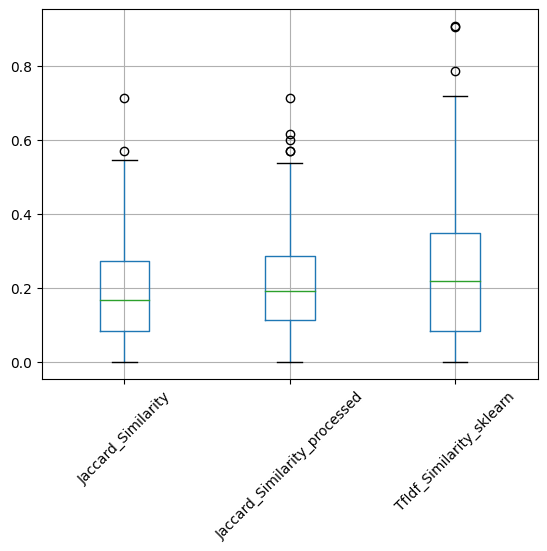

In [37]:
pics.boxplot(column=sim_cols, rot=45)

In [38]:
print(tfidf_matrix.shape)
print(tfidf_matrix.size)
print(tfidf_matrix.shape[0]*tfidf_matrix.shape[1])
tfidf_matrix

(1500, 2217)
15193
3325500


<1500x2217 sparse matrix of type '<class 'numpy.float64'>'
	with 15193 stored elements in Compressed Sparse Row format>

In [39]:
tfidf_matrix.size/(tfidf_matrix.shape[0]*tfidf_matrix.shape[1])

0.00456863629529394

In [40]:
#pics.loc[17]

In [41]:
#print(pics["caption1"].loc[17])
#print(pics["caption2"].loc[17])

In [42]:
#pics[["title","TfIdf_Similarity", "TfIdf_Similarity_processed", "TfIdf_Similarity_sklearn"]]

In [81]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from scipy.sparse import vstack

# Assuming 'features' is your sparse matrix
# and it's already preprocessed appropriately

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0, init="random")

# create the tsne arrangement of points in 2D (it is not really dimensionality reduction - it is arranging
# the points so that the most similar )
reduced_features = tsne.fit_transform(vstack((
    tfidf_matrix[50:100],
    tfidf_matrix[300:350],
    tfidf_matrix[600:650],
    tfidf_matrix[900:950],
    tfidf_matrix[1200:1250]
)))

# Plot
#plt.figure(figsize=(10, 6))
#plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
#plt.title('t-SNE Visualization of Data Items')
#plt.xlabel('t-SNE Feature 1')
#plt.ylabel('t-SNE Feature 2')
#plt.show()

In [44]:
!pip install plotly

In [82]:
import plotly.express as px
import plotly.io as pio

# Reduced features from t-SNE and labels are assumed to be defined already

# Create a DataFrame for Plotly
plot_df = pd.DataFrame(reduced_features, columns=['Feature 1', 'Feature 2'])
plot_df['Text'] = [f'{pic}_caption{i}' for i in range(1, 6) for pic in pics.index.values[:50]]

# Create a scatter plot
fig = px.scatter(plot_df, x='Feature 1', y='Feature 2', hover_data=['Text'])

# Update layout
fig.update_layout(title='t-SNE Visualization with Text on Hover',
                  xaxis_title='t-SNE Feature 1',
                  yaxis_title='t-SNE Feature 2')

# Save to HTML
file_name = 'interactive_tsne_plot.html'
pio.write_html(fig, file=file_name)

print(f"Plot saved as {file_name}")

# This saves the plot as an html file, which is foolproof on any machine (which is why I did it this way)

# But (I believe) you can also display plotly interactive plots within Jupyter. Can you work out how to do this?

pio.show(fig)

Plot saved as interactive_tsne_plot.html


#Word embeddings

In [47]:
import spacy

In [48]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [49]:
# Load the model with word embeddings
nlp = spacy.load('en_core_web_md')

In [50]:
pics["Spacy_Similarity"] = pics.apply(lambda x: nlp(x.caption1).similarity(nlp(x.caption2)), axis=1)
sim_cols.append("Spacy_Similarity")
#pics

In [51]:
log_loss.extend([[sim_cols[-1], logloss(pics,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['Spacy_Similarity', 0.2141952329201534]


<Axes: >

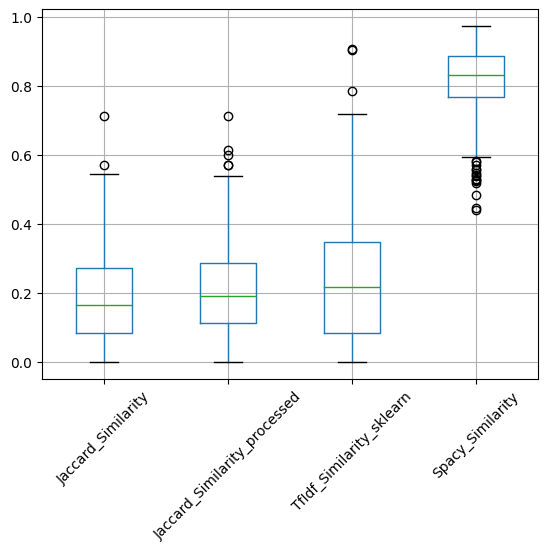

In [52]:
pics.boxplot(column=sim_cols, rot=45)

In [53]:
pics["Spacy_Similarity_processed"] = pics.apply(lambda x: nlp(x.caption1_processed).similarity(nlp(x.caption2_processed)), axis=1)
sim_cols.append("Spacy_Similarity_processed")

In [54]:
log_loss.extend([[sim_cols[-1], logloss(pics,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['Spacy_Similarity_processed', 0.206122836571163]


<Axes: >

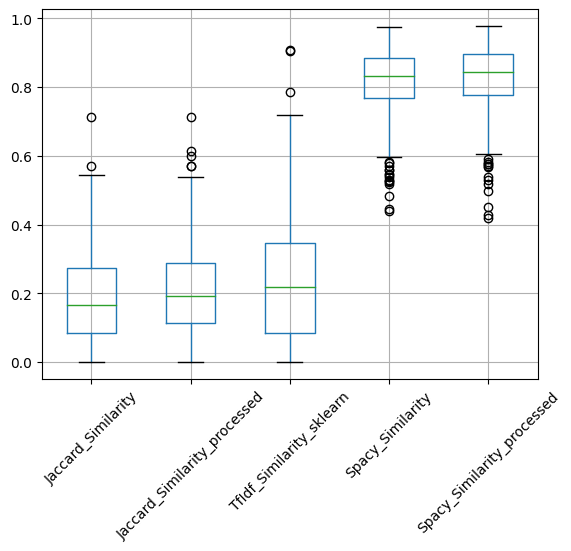

In [55]:
pics.boxplot(column=sim_cols, rot=45)

                 Scoring Method  Log Loss
0            Jaccard_Similarity  2.015858
1  Jaccard_Similarity_processed  1.813171
2      TfIdf_Similarity_sklearn  2.117084
3              Spacy_Similarity  0.214195
4    Spacy_Similarity_processed  0.206123


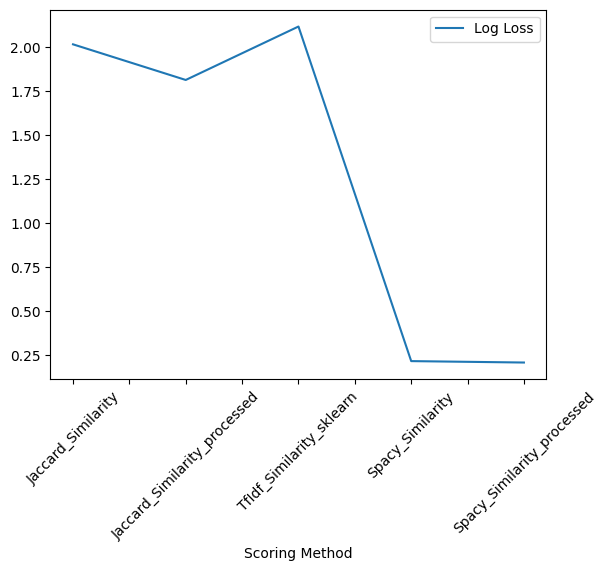

In [56]:
lldf = pd.DataFrame(log_loss,columns=["Scoring Method","Log Loss"])
lldf.plot.line(x="Scoring Method",rot=45)
print(lldf)

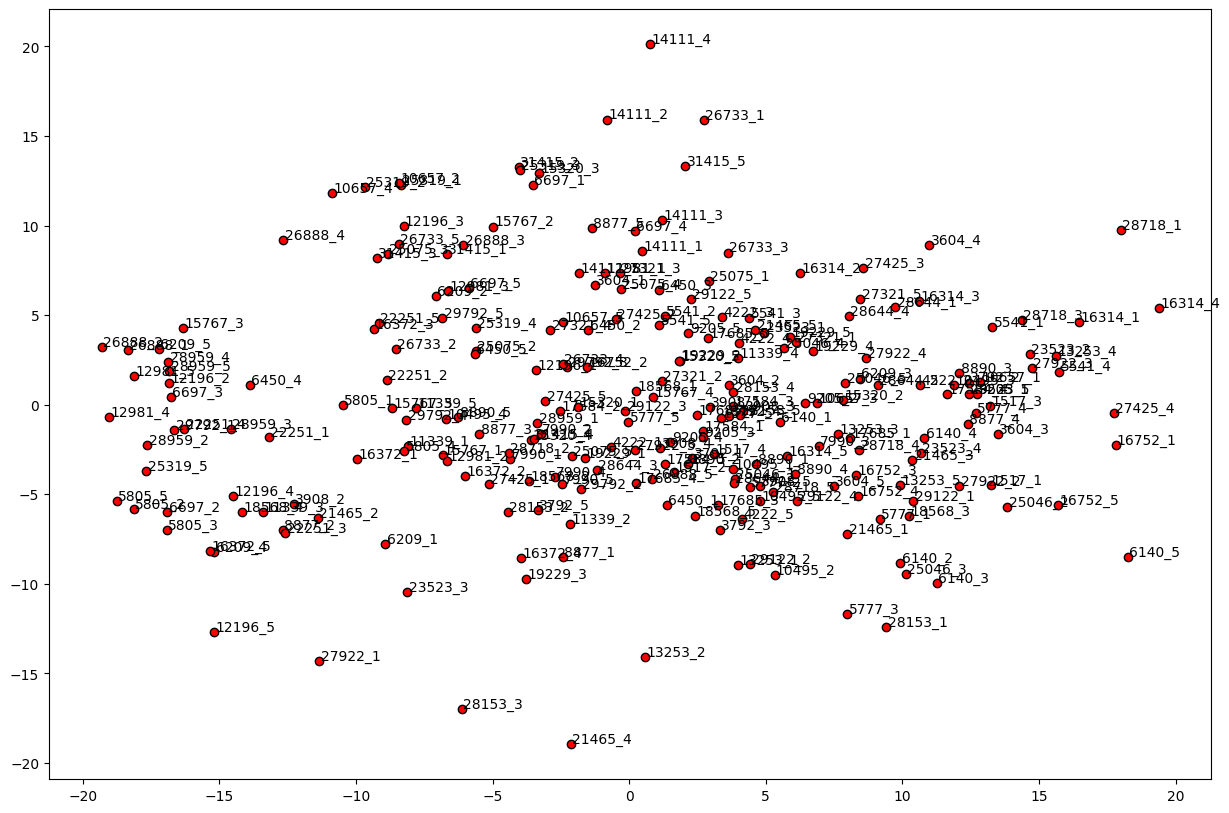

In [85]:
from sklearn.decomposition import PCA  # We will use PCA to visualise the embeddings.

des_list = pics.caption1.tolist()[:50]+pics.caption2.tolist()[:50]+pics.caption3.tolist()[:50]+pics.caption4.tolist()[:50]+pics.caption5.tolist()[:50]
des_vectors = np.array([nlp(movie_des).vector for movie_des in des_list])

twodim = PCA().fit_transform(des_vectors)[:,:2]

plt.figure(figsize=(15,10))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
for movie, (x,y) in zip([f'{pic}_{i}' for i in range(1, 6) for pic in pics.index.values[:50]], twodim):
  plt.text(x+0.05, y+0.05, movie)

# Sentence Embeddings

https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

In [58]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 1.6 MB/s eta 0:00:00


In [59]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [60]:
pics["caption1_sbert"] = pics.apply(lambda x: sbert_model.encode([x.caption1])[0], axis=1)
pics["caption2_sbert"] = pics.apply(lambda x: sbert_model.encode([x.caption2])[0], axis=1)
pics["caption1_sbert_processed"] = pics.apply(lambda x: sbert_model.encode([x.caption1_processed])[0], axis=1)
pics["caption2_sbert_processed"] = pics.apply(lambda x: sbert_model.encode([x.caption2_processed])[0], axis=1)


In [61]:
pics["sbert_Similarity"] = pics.apply(lambda x: 1-cosine(x.caption1_sbert, x.caption2_sbert)/2, axis=1)
sim_cols.append("sbert_Similarity")

In [62]:
log_loss.extend([[sim_cols[-1], logloss(pics,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['sbert_Similarity', 0.18326762275471165]


In [63]:
pics["sbert_Similarity_processed"] = pics.apply(lambda x: 1-cosine(x.caption1_sbert_processed, x.caption2_sbert_processed)/2, axis=1)
sim_cols.append("sbert_Similarity_processed")

In [64]:
log_loss.extend([[sim_cols[-1], logloss(pics,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['sbert_Similarity_processed', 0.18537219383737455]


<Axes: >

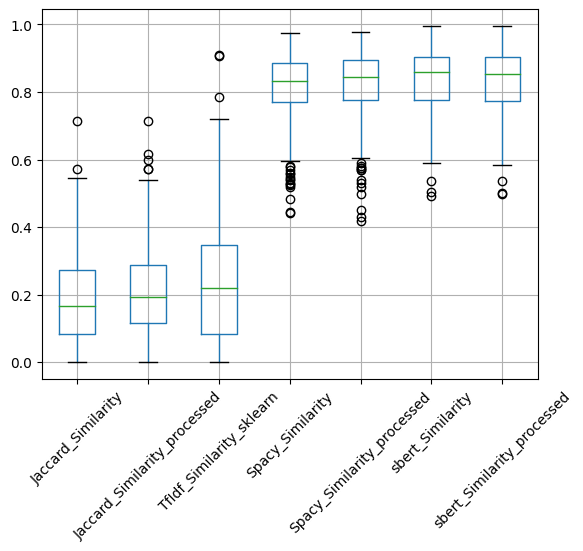

In [65]:
pics.boxplot(column=sim_cols, rot=45)

                 Scoring Method  Log Loss
0            Jaccard_Similarity  2.015858
1  Jaccard_Similarity_processed  1.813171
2      TfIdf_Similarity_sklearn  2.117084
3              Spacy_Similarity  0.214195
4    Spacy_Similarity_processed  0.206123
5              sbert_Similarity  0.183268
6    sbert_Similarity_processed  0.185372


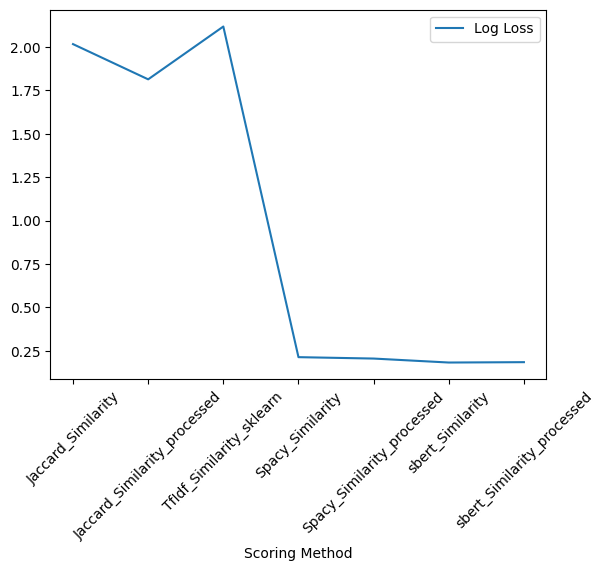

In [66]:
lldf = pd.DataFrame(log_loss,columns=["Scoring Method","Log Loss"])
lldf.plot.line(x="Scoring Method",rot=45)
print(lldf)

#Negative Comparison

In [60]:
#pics.columns

In [61]:
import random
random.seed(42)

In [62]:
movieIDs = pics.index.to_list()

cols = ["caption1", "caption1_words", "caption1_lower",
        "caption1_lower_words", "caption1_processed",
        "caption1_processed_words", "caption1_tfidf_sklearn",
        "caption1_sbert", "caption1_sbert_processed"
        ]
caption2s = [pd.DataFrame(cols),pd.DataFrame(cols)]
for i in range(2):
  random.shuffle(movieIDs)
  caption2s[i] = pics[cols].loc[movieIDs].reset_index(drop=True)
  caption2s[i].columns = [f'{col}_{i+1}' for col in caption2s[i].columns]

In [63]:
movie_pairs = pd.concat(caption2s, axis=1)
movie_pairs

,caption1_1,caption1_words_1,caption1_lower_1,caption1_lower_words_1,caption1_processed_1,caption1_processed_words_1,caption1_tfidf_sklearn_1,caption1_sbert_1,caption1_sbert_processed_1,caption1_2,caption1_words_2,caption1_lower_2,caption1_lower_words_2,caption1_processed_2,caption1_processed_words_2,caption1_tfidf_sklearn_2,caption1_sbert_2,caption1_sbert_processed_2
0,a girl sits on a swing ride.,"[a, girl, sits, on, a, swing, ride.]",a girl sits on a swing ride.,"[a, girl, sits, on, a, swing, ride.]",a girl sits on a swing ride,"[a, girl, sits, on, a, swing, ride]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.44389343, -1.0528265, -0.005334963, 0.2410...","[-0.36822087, -1.103867, 0.026619757, 0.255394...",A black dog wearing a blue shirt is jumping in...,"[A, black, dog, wearing, a, blue, shirt, is, j...",a black dog wearing a blue shirt is jumping in...,"[a, black, dog, wearing, a, blue, shirt, is, j...",a black dog wearing a blue shirt is jumping in...,"[a, black, dog, wearing, a, blue, shirt, is, j...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.09734646, -0.06763837, -1.7002696, -0.2463...","[-0.09734646, -0.06763837, -1.7002696, -0.2463..."
1,Four men playing their instruments in the stre...,"[Four, men, playing, their, instruments, in, t...",four men playing their instruments in the stre...,"[four, men, playing, their, instruments, in, t...",four men playing their instruments in the stre...,"[four, men, playing, their, instruments, in, t...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.044182003, -0.20902054, 0.19394341, -0.2367...","[0.035971873, -0.28969845, 0.17439955, -0.2217...","A man and a woman, both musicians, stand on st...","[A, man, and, a, woman,, both, musicians,, sta...","a man and a woman, both musicians, stand on st...","[a, man, and, a, woman,, both, musicians,, sta...",a man and a woman both musicians stand on stag...,"[a, man, and, a, woman, both, musicians, stand...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.7411825, -0.13383585, 0.21682413, -0.61893...","[-0.7153842, -0.13997401, 0.25086495, -0.51791..."
2,Two people in racing clothes and helmets are r...,"[Two, people, in, racing, clothes, and, helmet...",two people in racing clothes and helmets are r...,"[two, people, in, racing, clothes, and, helmet...",two people in racing clothes and helmets are r...,"[two, people, in, racing, clothes, and, helmet...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.6014187, -0.06833306, -0.13798305, 0.07080...","[-0.49123332, -0.08815488, -0.011913851, 0.072...",A young boy about the age of 2 sits on gray ro...,"[A, young, boy, about, the, age, of, 2, sits, ...",a young boy about the age of 2 sits on gray ro...,"[a, young, boy, about, the, age, of, 2, sits, ...",a young boy about the age of 2 sits on gray ro...,"[a, young, boy, about, the, age, of, 2, sits, ...","[0.0, 0.28632359036616073, 0.0, 0.0, 0.0, 0.0,...","[0.101422675, -0.26818547, -0.5508916, 0.33063...","[0.13673599, -0.2679471, -0.47598273, 0.376498..."
3,A man in a hat and blazer performs on the stre...,"[A, man, in, a, hat, and, blazer, performs, on...",a man in a hat and blazer performs on the stre...,"[a, man, in, a, hat, and, blazer, performs, on...",a man in a hat and blazer performs on the stre...,"[a, man, in, a, hat, and, blazer, performs, on...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4939826, -0.51864254, -0.13631243, -0.29540...","[0.5204762, -0.56399757, -0.08454894, -0.26357...",Man on snowmobile launching up into the air.,"[Man, on, snowmobile, launching, up, into, the...",man on snowmobile launching up into the air.,"[man, on, snowmobile, launching, up, into, the...",man on snowmobile launching up into the air,"[man, on, snowmobile, launching, up, into, the...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.511224, 0.83094364, -0.7035187, 0.14988376...","[-0.4814864, 0.76769567, -0.64278835, 0.141614..."
4,"A young man wearing a hoodie, pants, a

In [64]:
movie_pairs["same?"] = movie_pairs["caption1_1"] == movie_pairs["caption1_2"]
sum(movie_pairs["same?"])

1

In [65]:
movie_pairs.columns

Index(['caption1_1', 'caption1_words_1', 'caption1_lower_1',
       'caption1_lower_words_1', 'caption1_processed_1',
       'caption1_processed_words_1', 'caption1_tfidf_sklearn_1',
       'caption1_sbert_1', 'caption1_sbert_processed_1', 'caption1_2',
       'caption1_words_2', 'caption1_lower_2', 'caption1_lower_words_2',
       'caption1_processed_2', 'caption1_processed_words_2',
       'caption1_tfidf_sklearn_2', 'caption1_sbert_2',
       'caption1_sbert_processed_2', 'same?'],
      dtype='object')

In [66]:
def cos(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [67]:
movie_pairs["Jaccard_Similarity"] = movie_pairs.apply(lambda x: Jaccard(x.caption1_words_1, x.caption1_words_2), axis=1)
movie_pairs["Jaccard_Similarity_processed"] = movie_pairs.apply(lambda x: Jaccard(x.caption1_processed_words_1, x.caption1_processed_words_2), axis=1)
movie_pairs["TfIdf_Similarity_sklearn"] = movie_pairs.apply(lambda x: 1-cosine(x.caption1_tfidf_sklearn_1, x.caption1_tfidf_sklearn_2), axis=1)
movie_pairs["Spacy_Similarity"] = movie_pairs.apply(lambda x: nlp(x.caption1_1).similarity(nlp(x.caption1_2)), axis=1)
movie_pairs["Spacy_Similarity_processed"] = movie_pairs.apply(lambda x: nlp(x.caption1_processed_1).similarity(nlp(x.caption1_processed_2)), axis=1)
movie_pairs["sbert_Similarity"] = movie_pairs.apply(lambda x: 1-cosine(x.caption1_sbert_1, x.caption1_sbert_2)/2, axis=1)
movie_pairs["sbert_Similarity_processed"] = movie_pairs.apply(lambda x: 1-cosine(x.caption1_sbert_processed_1, x.caption1_sbert_processed_2)/2, axis=1)


In [68]:
movie_pairs.columns

Index(['caption1_1', 'caption1_words_1', 'caption1_lower_1',
       'caption1_lower_words_1', 'caption1_processed_1',
       'caption1_processed_words_1', 'caption1_tfidf_sklearn_1',
       'caption1_sbert_1', 'caption1_sbert_processed_1', 'caption1_2',
       'caption1_words_2', 'caption1_lower_2', 'caption1_lower_words_2',
       'caption1_processed_2', 'caption1_processed_words_2',
       'caption1_tfidf_sklearn_2', 'caption1_sbert_2',
       'caption1_sbert_processed_2', 'same?', 'Jaccard_Similarity',
       'Jaccard_Similarity_processed', 'TfIdf_Similarity_sklearn',
       'Spacy_Similarity', 'Spacy_Similarity_processed', 'sbert_Similarity',
       'sbert_Similarity_processed'],
      dtype='object')

In [69]:
movie_pairs[movie_pairs["sbert_Similarity"]<0][['caption1_1',
       'caption1_sbert_1', 'caption1_2', 'caption1_sbert_2',
       'sbert_Similarity', 'sbert_Similarity_processed']]

,caption1_1,caption1_sbert_1,caption1_2,caption1_sbert_2,sbert_Similarity,sbert_Similarity_processed


In [70]:
ll = []
for col in sim_cols:
  print(col)
  ll.append(logloss(movie_pairs,col,False))
  print(ll[-1])
  print("")

Jaccard_Similarity
0.13579583297050374

Jaccard_Similarity_processed
0.13146248783043907

TfIdf_Similarity_sklearn
0.0826733288734679

Spacy_Similarity
1.4252316252599677

Spacy_Similarity_processed
1.4673878313859787

sbert_Similarity
0.9722124848498012

sbert_Similarity_processed
0.9704767107123949



<Axes: >

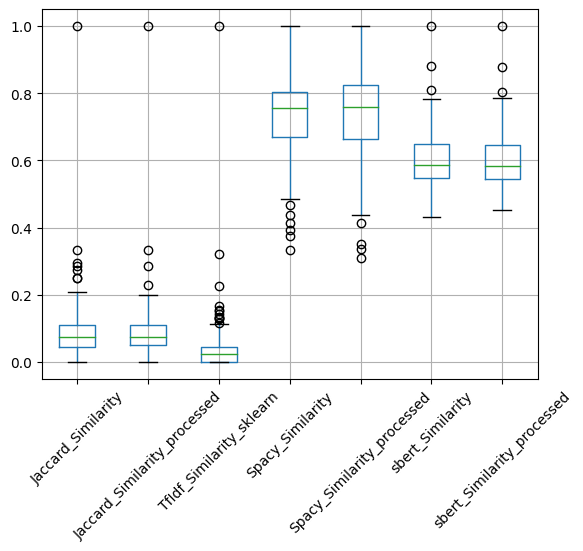

In [71]:
movie_pairs.boxplot(column=sim_cols, rot=45)

In [72]:
llS = pd.Series(ll)

In [73]:
LL = pd.concat([lldf,llS],axis=1)
LL.columns = ["Scoring Method","Log Loss","Log Loss Diff"]
LL["Overall Log Loss"] = (LL["Log Loss Diff"]+LL["Log Loss"])/2
LL

,Scoring Method,Log Loss,Log Loss Diff,Overall Log Loss
0,Jaccard_Similarity,1.998450,0.135796,1.067123
1,Jaccard_Similarity_processed,1.728585,0.131462,0.930024
2,TfIdf_Similarity_sklearn,2.004159,0.082673,1.043416
3,Spacy_Similarity,0.223106,1.425232,0.824169
4,Spacy_Similarity_processed,0.216500,1.467388,0.841944
5,sbert_Similarity,0.159566,0.972212,0.565889
6,sbert_Similarity_processed,0.161589,0.970477,0.566033


<Axes: xlabel='Scoring Method'>

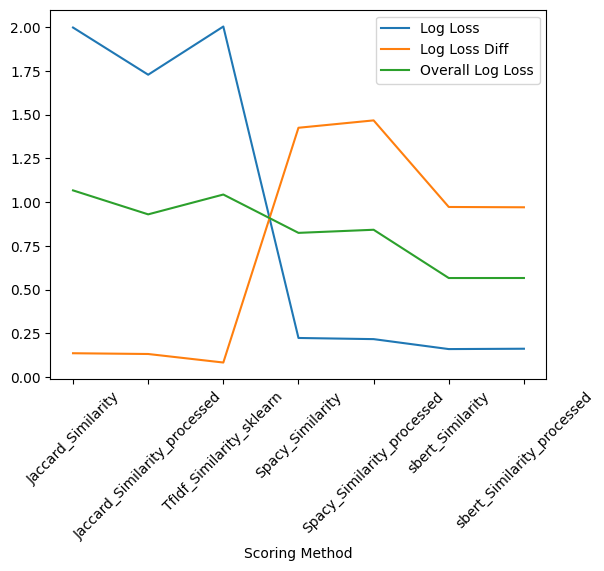

In [74]:
LL.plot.line(x="Scoring Method",rot=45)

next bit

In [ ]:
caption2_lengths = [len(description) for description in pics["caption2_words"].values]
np.mean(caption2_lengths)

11.786666666666667

In [ ]:
caption1_lengths = [len(description) for description in pics["caption1_words"].values]
np.mean(caption1_lengths)

12.046666666666667

In [ ]:
caption2_char_lengths = [len(description) for description in pics["caption2"].values]
np.mean(caption2_char_lengths)

60.193333333333335

In [ ]:
caption1_char_lengths = [len(description) for description in pics["caption1"].values]
np.mean(caption1_char_lengths)

62.026666666666664